# Regression Model for Car Price Prediction

In this Machine Learning Project, we will be analysing the dataset taken from www.kaggle.com related to used cars. This data is extracted from a website www.cardekho.com, consists of features like car name, manufacturing year, kms driven and many more. Our focus will be on analysing the data, getting the insights related to these features and there role in affecting the sales price, we will perform feature engineering, feature selection and develop a Regression model that will predict the sales price based on the new data.

### Importing the Libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics

### Reading the 'car_details.csv' Dataset

In [2]:
# reading dataset as DataFrame by pandas
car_df = pd.read_csv('car_details.csv')

In [3]:
# observing the data that we have 
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


It can be observed that in total we have 8128 rows and 13 columns(features) i.e name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque and seats

In [4]:
# understanding the features that we have in the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


It can be seen that we have 4 numerical features and rest of them are categorical feaures but there are some features that needs to be converted to numerical features like mileage, engine, max_power. 

In [5]:
# coverting mileage, engine, max_power to numerical features
car_df['mileage'] = pd.to_numeric(car_df['mileage'].apply(lambda x: str(x)[:-5]), errors = 'coerce')
car_df['engine'] = pd.to_numeric(car_df['engine'].apply(lambda x: str(x)[:-3]), errors = 'coerce')
car_df['max_power'] = pd.to_numeric(car_df['max_power'].apply(lambda x: str(x)[:-4]), errors = 'coerce')

In [6]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
# Checking for Nan Values in features
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        222
torque           222
seats            221
dtype: int64

### Handling the Nan Values in the features

In [8]:
# Handling Nan values in column mileage, engine, max_power, torque and seats.
# mileage, engine and max_power can be imputed by mean values as they are continuous values
car_df['mileage'].fillna(car_df['mileage'].mean(),inplace = True)
car_df['engine'].fillna(car_df['engine'].mean(),inplace = True)
car_df['max_power'].fillna(car_df['max_power'].mean(),inplace = True)

# Nan values in seats are imputed by median as it is a discrete value
car_df['seats'].fillna(car_df['seats'].median(),inplace = True)

# Nan values in torque are imputed by a value 'Unknown'
car_df['torque'].fillna('Unknown',inplace = True)

In [9]:
# Checking if the Nan values got removed from the features
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### Encoding the Categorical values

In [10]:
# Checking the Cardinality of each Categorical value
print('Cardinality of fuel feature: {}'.format(car_df['fuel'].nunique()))
print('Cardinality of seller_type feature: {}'.format(car_df['seller_type'].nunique()))
print('Cardinality of transmission feature: {}'.format(car_df['transmission'].nunique()))
print('Cardinality of owner feature: {}'.format(car_df['owner'].nunique()))
print('Cardinality of torque feature: {}'.format(car_df['torque'].nunique()))

Cardinality of fuel feature: 4
Cardinality of seller_type feature: 3
Cardinality of transmission feature: 2
Cardinality of owner feature: 5
Cardinality of torque feature: 442


As the cardinality of fuel, seller_type, transmission, owner features is less so we can handle them by one hot encoding, but in case of torque we we cant use one Hot encoding so we will encode it by Count Frequency Encoder.

In [11]:
# checking for the unique values
print(car_df['fuel'].unique())
print(car_df['seller_type'].unique())
print(car_df['transmission'].unique())
print(car_df['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


#### Encoding features fuel, seller_type, transmission, owner by One Hot Encoding

In [12]:
for i in ['fuel', 'seller_type', 'transmission', 'owner']:
    temp = pd.get_dummies(car_df[i], prefix = i, drop_first = True)
    car_df = pd.concat([car_df, temp], axis = 1)
    car_df.drop(i, axis = 1, inplace = True)
car_df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,1,1,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,1,1,0,1,0,0,0,0


#### Encoding Torque by Ordered Integer Encoding (Ordering the labels according to the target)

In [13]:
# Creating an ordered array of torque values 
ordered_labels = car_df.groupby(['torque'])['selling_price'].mean().sort_values().index
ordered_labels

Index(['130Nm@ 3000rpm', '48@ 3,000+/-500(NM@ rpm)', '48Nm@ 3000rpm',
       '6@ 2,500(kgm@ rpm)', '121Nm@ 2800rpm', '4.8kgm@ 3000rpm',
       '8.5@ 2,500(kgm@ rpm)', '72.9Nm@ 2250rpm', '71Nm@ 3500rpm',
       '11.3kgm@ 4700rpm',
       ...
       '382nm@ 1750-2250rpm', '202Nm@ 3600-5200rpm', '300Nm@ 1600-4000rpm',
       '480Nm', '490Nm@ 1600rpm', '620Nm@ 2000-2500rpm', '620Nm@ 1600-2400rpm',
       '320Nm@ 1400-4100rpm', '620Nm@ 1500-2500rpm', '640Nm@ 1740rpm'],
      dtype='object', name='torque', length=442)

In [14]:
# Creating a mapping for these torque values
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'130Nm@ 3000rpm': 0,
 '48@ 3,000+/-500(NM@ rpm)': 1,
 '48Nm@ 3000rpm': 2,
 '6@ 2,500(kgm@ rpm)': 3,
 '121Nm@ 2800rpm': 4,
 '4.8kgm@ 3000rpm': 5,
 '8.5@ 2,500(kgm@ rpm)': 6,
 '72.9Nm@ 2250rpm': 7,
 '71Nm@ 3500rpm': 8,
 '11.3kgm@ 4700rpm': 9,
 '78Nm@ 4500rpm': 10,
 '12.5@ 2,500(kgm@ rpm)': 11,
 '51Nm@ 4000+/-500rpm': 12,
 '57Nm@ 2500rpm': 13,
 '99.8Nm@ 2700rpm': 14,
 '9.2@ 4,200(kgm@ rpm)': 15,
 '110Nm@ 4500rpm': 16,
 '102Nm@ 2600rpm': 17,
 '789Nm@ 2250rpm': 18,
 '12@ 2500(kgm@ rpm)': 19,
 '250Nm@ 1600-2000rpm': 20,
 '59Nm@ 2500rpm': 21,
 '115Nm@ 3200rpm': 22,
 '21.4@ 1,750-4,600(kgm@ rpm)': 23,
 '88.4Nm@ 4200rpm': 24,
 '18@ 1,600-2,200(kgm@ rpm)': 25,
 '190 Nm at 1750 rpm': 26,
 '13@ 2,500(kgm@ rpm)': 27,
 '12.5kgm@ 3500rpm': 28,
 '11.2@ 4,400(kgm@ rpm)': 29,
 '12.5@ 3,500(kgm@ rpm)': 30,
 '10.4@ 3,200(kgm@ rpm)': 31,
 '6.1@ 3,000(kgm@ rpm)': 32,
 '11.8@ 3,200(kgm@ rpm)': 33,
 '13.5@ 2500(kgm@ rpm)': 34,
 '85Nm@ 2500rpm': 35,
 '14.3@ 1,800-3,000(kgm@ rpm)': 36,
 '12@ 3,500(kgm@ rpm)': 

In [15]:
car_df['torque'] = car_df['torque'].map(ordinal_mapping)
car_df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,233,5.0,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,208,5.0,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,88,5.0,0,0,1,1,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,168,5.0,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,84,5.0,0,0,1,1,0,1,0,0,0,0


All the Categorical values have been encoded, we can remove the column name as it is not playing much role.

In [16]:
# Removing the feature name from Dataset
car_df.drop('name', axis = 1, inplace = True)

The feature year it won't be of much significance if we use it like this rather we can convert it in 'Number of years the car is old'. We can create a current_year feature that will have the current year and by subtracting the manufacture year we can get the age of the car

In [17]:
# Creating a current year column and calculating car age
car_df['current_year'] = dt.datetime.today().year
car_df['car_age'] = car_df['current_year'] - car_df['year']

# we can now drop the features current_year and year
car_df.drop(['year','current_year'], axis = 1, inplace = True)

In [18]:
# Final Dataset after Data Cleaning
car_df.head()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,car_age
0,450000,145500,23.40,1248.0,74.00,233,5.0,1,0,0,1,0,1,0,0,0,0,7
1,370000,120000,21.14,1498.0,103.52,208,5.0,1,0,0,1,0,1,0,1,0,0,7
2,158000,140000,17.70,1497.0,78.00,88,5.0,0,0,1,1,0,1,0,0,0,1,15
3,225000,127000,23.00,1396.0,90.00,168,5.0,1,0,0,1,0,1,0,0,0,0,11
4,130000,120000,16.10,1298.0,88.20,84,5.0,0,0,1,1,0,1,0,0,0,0,14


### Observing the correlation between the features

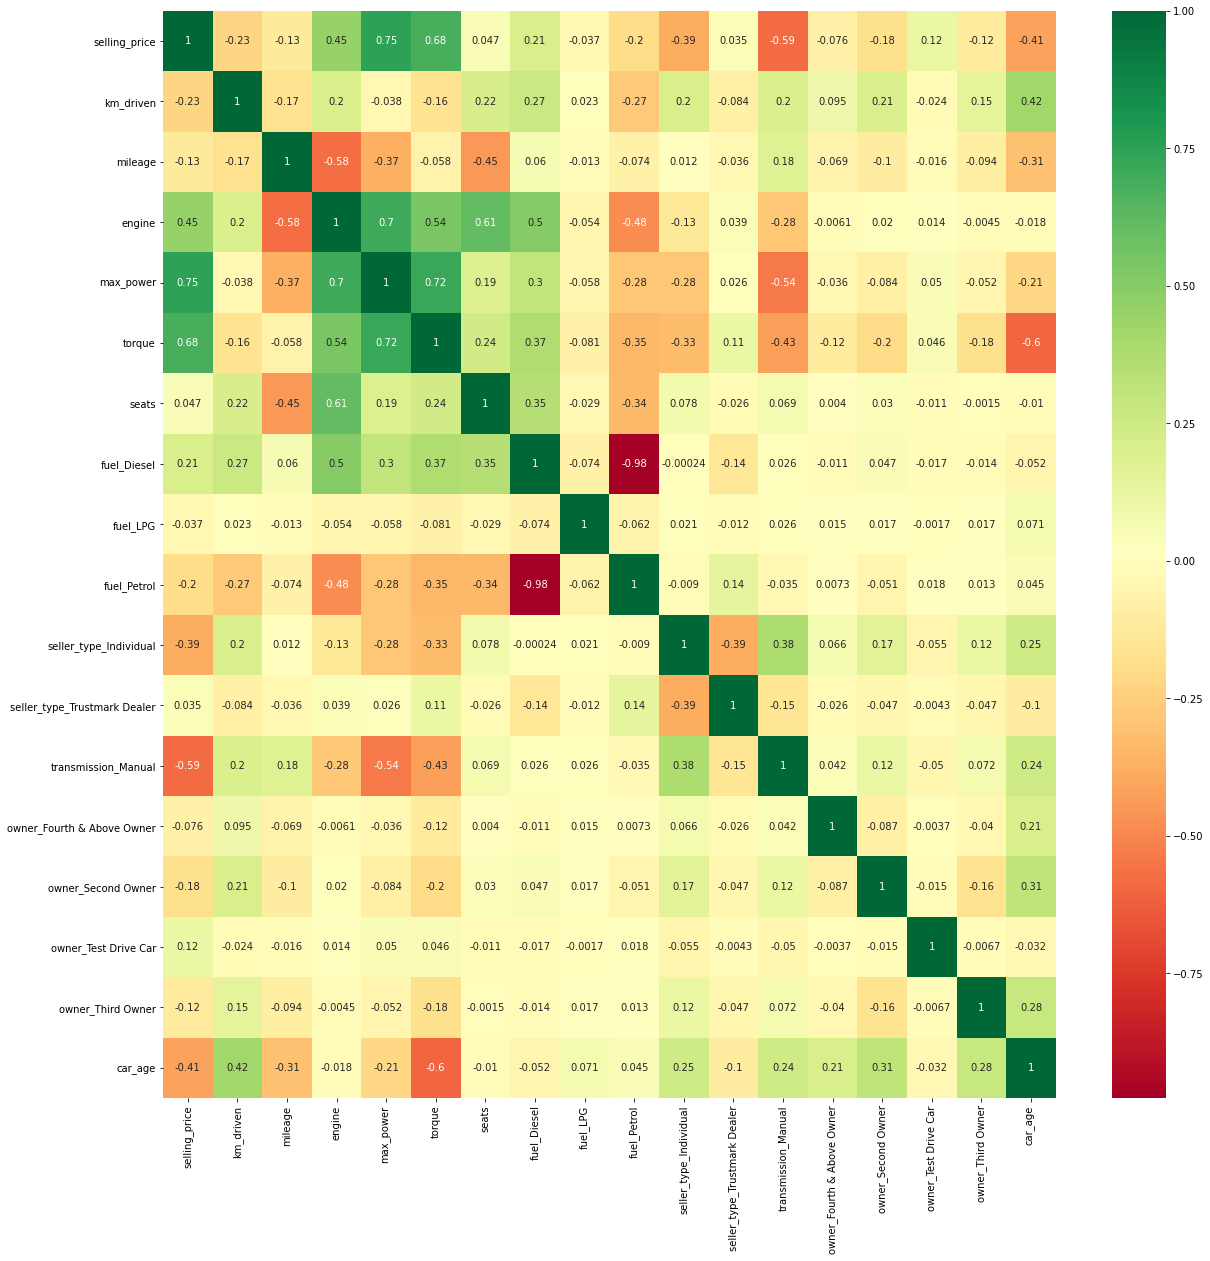

In [19]:
# Observing Correlation by Heatmap

corrmat = car_df.corr()
features = corrmat.index
plt.figure(figsize = [20,20])

g = sns.heatmap(car_df[features].corr(),annot = True, cmap = "RdYlGn")

### Separating features into dependent and independent

In [20]:
X = car_df.iloc[:,1:]
Y = car_df.iloc[:,0]

In [21]:
print(X.shape,' ',Y.shape)

(8128, 17)   (8128,)


### Finding the Important features by ExtraTreesRegressor

In [22]:
imp_model = ExtraTreesRegressor()
imp_model.fit(X,Y)

ExtraTreesRegressor()

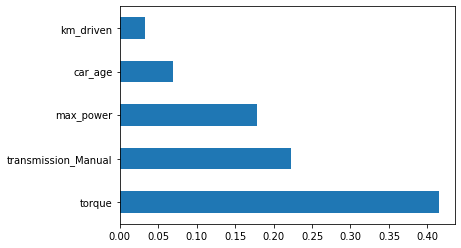

In [23]:
# plotting graph of feature importance
feat_imp = pd.Series(imp_model.feature_importances_, index = X.columns)
feat_imp.nlargest(5).plot(kind = 'barh')
plt.show()

### Train Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [25]:
print(x_train.shape,' ',x_test.shape)

(5689, 17)   (2439, 17)


### Creating a Random Forest Regressor Model

In [26]:
# Hyperparameter Tuning
# Number of Trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of Features to consider at each split
max_features = ['auto', 'sqrt']

# Maximum number of Levels in Trees
max_depth = [int(x) for x in np.linspace(start = 5,stop = 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum Number of Samples required at each node
min_samples_leaf = [1,2,5,10]

In [27]:
# Creating a random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
# Creating the base Model to tune

rf_model = RandomForestRegressor()

In [29]:
# creating a RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,
                              scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2,
                              random_state = 40, n_jobs = 1)

In [30]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   3.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
# Identifying the best parameters to train our model
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [32]:
# Creating model for best parameters
rf_model = RandomForestRegressor(n_estimators = 200, min_samples_split = 15, min_samples_leaf = 1,
                                 max_features = 'sqrt', max_depth = 20)

rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=15,
                      n_estimators=200)

In [33]:
# making the predictions
predictions = rf_model.predict(x_test)

In [34]:
predictions

array([633158.25747966, 137135.95119786, 147634.20919547, ...,
       495928.16388094, 293895.53923793, 252908.39671493])

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

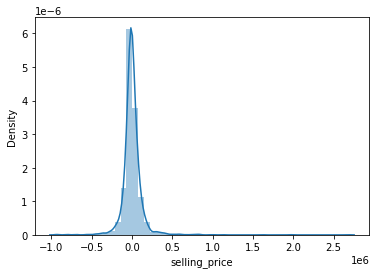

In [35]:
# observing the difference between the y_test and predictions data
sns.distplot(y_test - predictions)

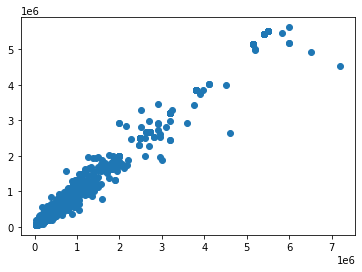

In [36]:
plt.scatter(y_test, predictions)

As we can see that we are getting a normal distribution for (x_test - predictions) distribution plot and a linear relation by scatter plot which shows that our model is working well and predicting good results.

### Evaluating the performance of Random Forest Regressor model

In [37]:
# Evaluating the performance of the model
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mape = np.mean(np.abs((y_test - predictions) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 68711.1920036248
Mean Squared Error (MSE): 18880214442.704453
Root Mean Squared Error (RMSE): 137405.29262988546
Mean Absolute Percentage Error (MAPE): 15.9
Accuracy: 84.1


Here it can be seen that we are getting a good accuracy of >80% while predicting the car price based on the different features. Thus Random Forest Regressor is considered to be a good choice for solving this regression problem.